In [1]:
import os
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import myServices as ms
import randForest as rfr
import numpy as np
import pandas as pd
import sklearn
import joblib

In [2]:
# to compute ececution time do:
# with timeit():
#     # your code, e.g., 
class timeit(): 
    from datetime import datetime
    def __enter__(self):
        self.tic = self.datetime.now()
    def __exit__(self, *args, **kwargs):
        print('runtime: {}'.format(self.datetime.now() - self.tic))

## Random Forest Section

In [ ]:
sklearn.metrics.get_scorer_names()

In [17]:
print(np.linspace(28,60, 19).astype(int))

[28 29 31 33 35 36 38 40 42 44 45 47 49 51 52 54 56 58 60]


In [18]:
DS = pd.read_csv('basin1CleanToTrain.csv', index_col = None)

In [20]:
min = DS['FAcc'].min()
max = DS['FAcc'].max()
delta = max - min
DS['FAcc_norm'] = (DS['FAcc']- min)/(delta) 

In [21]:
print(DS.keys())
DS.info()
print(DS.keys())


Index(['percentage', 'disToRiv', 'TWI', 'TPI', 'FAcc', 'slope', 'elevation',
       'FAcc_norm'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2479538 entries, 0 to 2479537
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   percentage  int64  
 1   disToRiv    float64
 2   TWI         float64
 3   TPI         float64
 4   FAcc        float64
 5   slope       float64
 6   elevation   float64
 7   FAcc_norm   float64
dtypes: float64(7), int64(1)
memory usage: 151.3 MB
Index(['percentage', 'disToRiv', 'TWI', 'TPI', 'FAcc', 'slope', 'elevation',
       'FAcc_norm'],
      dtype='object')


In [25]:
DS.describe()

,percentage,disToRiv,TWI,TPI,FAcc,slope,elevation,FAcc_norm
count,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06
mean,9.201795e-02,2.084064e+02,9.483515e+00,-3.328848e-04,4.352760e+04,4.821367e+00,1.453463e+02,6.924467e-04
std,6.610626e-01,1.713850e+02,4.081659e+00,1.949152e-01,1.031605e+06,4.994698e+00,4.569706e+01,1.642044e-02
min,0.000000e+00,0.000000e+00,-9.252120e+00,-7.461320e+00,2.500000e+01,4.700000e-04,-3.685000e-02,0.000000e+00
25%,0.000000e+00,7.382411e+01,5.553190e+00,-6.226000e-02,8.892947e+01,1.600760e+00,1.157656e+02,1.017589e-06
50%,0.000000e+00,1.677051e+02,1.025636e+01,-2.700000e-04,2.881975e+02,3.192175e+00,1.481632e+02,4.189410e-06
75%,0.000000e+00,3.010399e+02,1.289330e+01,6.091000e-02,1.265309e+03,6.192805e+00,1.797259e+02,1.974245e-05
max,5.000000e+00,1.349713e+03,2.486353e+01,6.706970e+00,6.282450e+07,7.002943e+01,2.605691e+02,1.000000e+00


In [27]:
DS.drop(['FAcc'],axis=1, inplace = True)
DS.keys()

Index(['percentage', 'disToRiv', 'TWI', 'TPI', 'slope', 'elevation',
       'FAcc_norm'],
      dtype='object')

In [28]:
DS.to_csv('basin1_FaccNorm.csv', index = None)

In [29]:
DS = pd.read_csv('basin1_FaccNorm.csv', index_col = None)

In [31]:
print(DS.keys())
DS.describe()

Index(['percentage', 'disToRiv', 'TWI', 'TPI', 'slope', 'elevation',
       'FAcc_norm'],
      dtype='object')


,percentage,disToRiv,TWI,TPI,slope,elevation,FAcc_norm
count,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06,2.479538e+06
mean,9.201795e-02,2.084064e+02,9.483515e+00,-3.328848e-04,4.821367e+00,1.453463e+02,6.924467e-04
std,6.610626e-01,1.713850e+02,4.081659e+00,1.949152e-01,4.994698e+00,4.569706e+01,1.642044e-02
min,0.000000e+00,0.000000e+00,-9.252120e+00,-7.461320e+00,4.700000e-04,-3.685000e-02,0.000000e+00
25%,0.000000e+00,7.382411e+01,5.553190e+00,-6.226000e-02,1.600760e+00,1.157656e+02,1.017589e-06
50%,0.000000e+00,1.677051e+02,1.025636e+01,-2.700000e-04,3.192175e+00,1.481632e+02,4.189410e-06
75%,0.000000e+00,3.010399e+02,1.289330e+01,6.091000e-02,6.192805e+00,1.797259e+02,1.974245e-05
max,5.000000e+00,1.349713e+03,2.486353e+01,6.706970e+00,7.002943e+01,2.605691e+02,1.000000e+00


In [4]:
model = rfr.loadModel('./bestModels/21-46-40 Classifier/2207232146.pkl')

In [5]:
print(model)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.8,
                       n_estimators=58, random_state=50)


In [33]:
import numpy as np

def stable_sigmoid(x):
    sig = np.where(x < 0, np.exp(x)/(1 + np.exp(x)), 1/(1 + np.exp(-x)))
    return sig

-32.23619130191664
0.010049325753001472


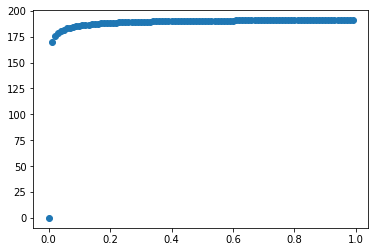

In [105]:
x = np.arange(0.000001,1,0.01)
print(np.max(np.log(0.00000000000001)))
print(np.abs(np.max(np.log(x))))
Y = np.max(np.log(x)**2) - np.log(x)**2 
plt.scatter(x,Y)
# plt.scatter(x,z)